# Tratamento de Dados de Satélite

**Equipe:** Daniel, Jones, Kleberson e Murilo

## Apresentação

Breve apresentação sobre o tema escolhido e o que será feito.

## Tratamento de dados

**Importando bibliotecas necessárias**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
print("Hello, world!")

Hello, world!


**Plot test**

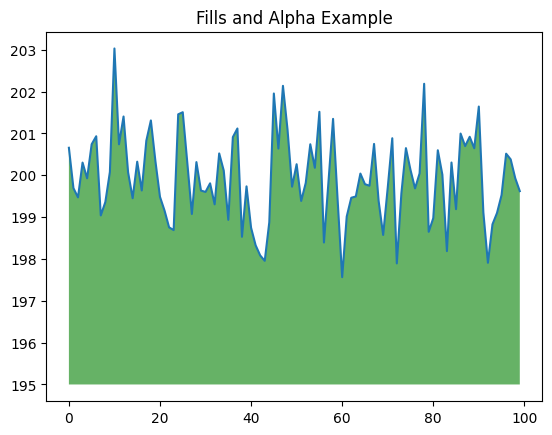

In [2]:
ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

## Conclusão